In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt

In [2]:
crime_rates = pd.read_csv('crime_data.csv')

In [3]:
crime_rates.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_rates.rename(columns = {'Unnamed: 0':'State'}, inplace = True)

#### EDA

<AxesSubplot:xlabel='State'>

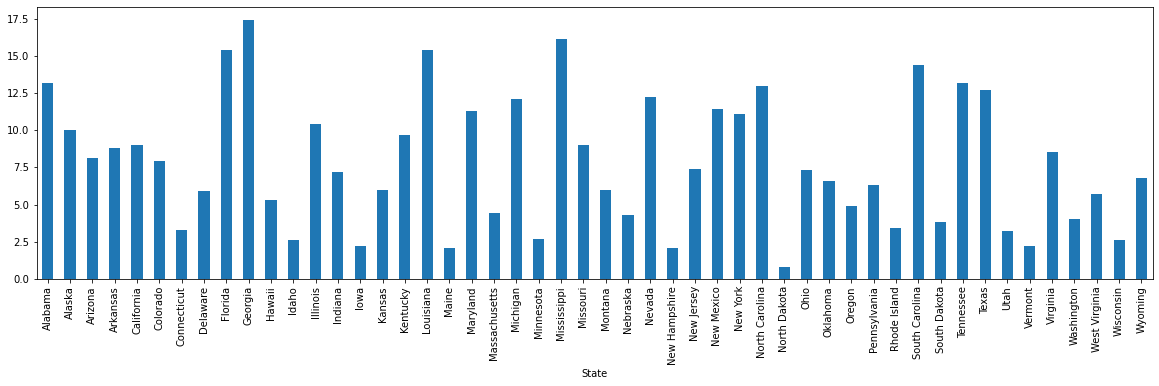

In [5]:
plt.figure(figsize=(20,5))
crime_rates.groupby('State')['Murder'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

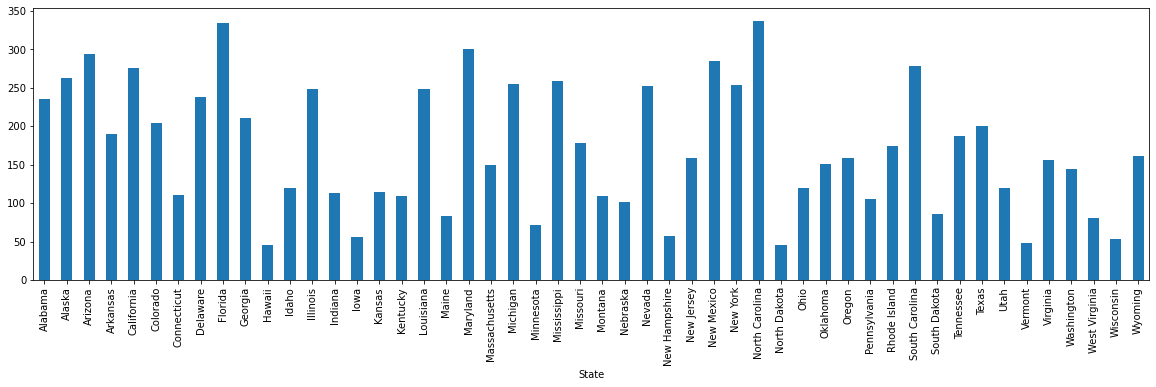

In [6]:
plt.figure(figsize=(20,5))
crime_rates.groupby('State')['Assault'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

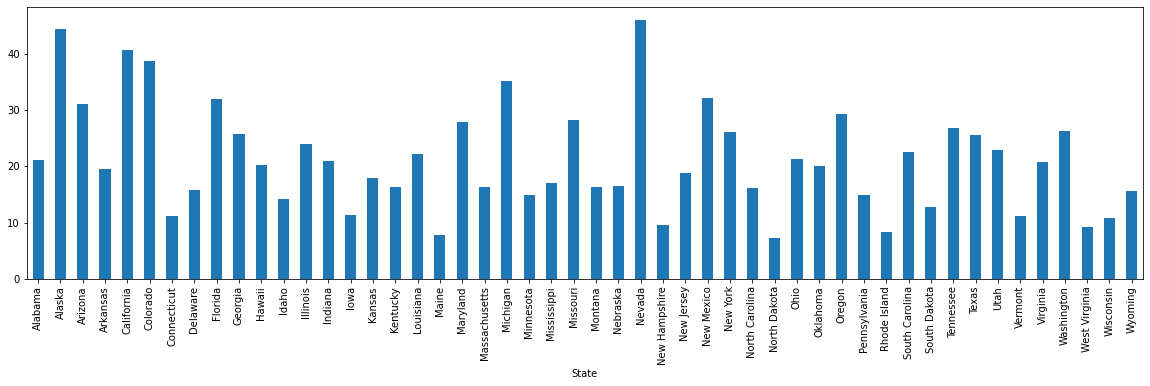

In [7]:
plt.figure(figsize=(20,5))
crime_rates.groupby('State')['Rape'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

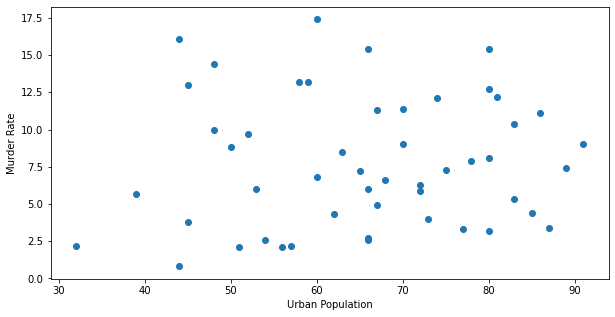

In [8]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime_rates)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

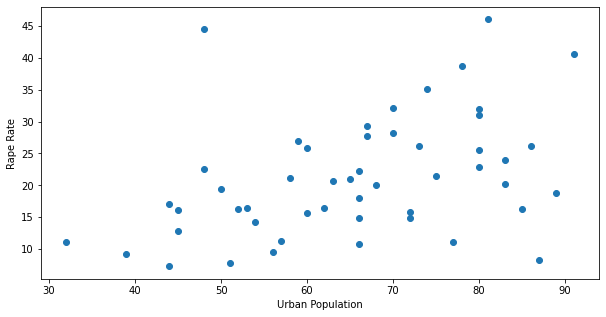

In [9]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime_rates)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

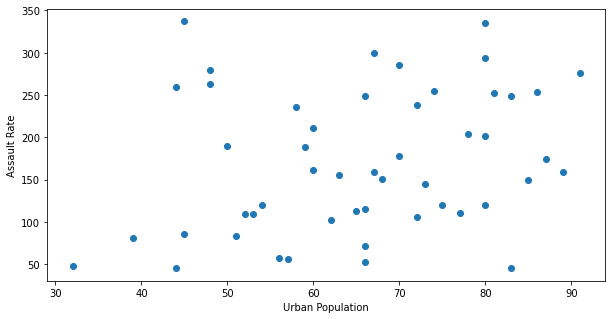

In [10]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime_rates)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

In [11]:
crime_rates.set_index('State', inplace = True)

In [12]:
print(crime_rates.describe())

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


In [13]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(crime_rates)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

C:\Users\proyas.bose\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


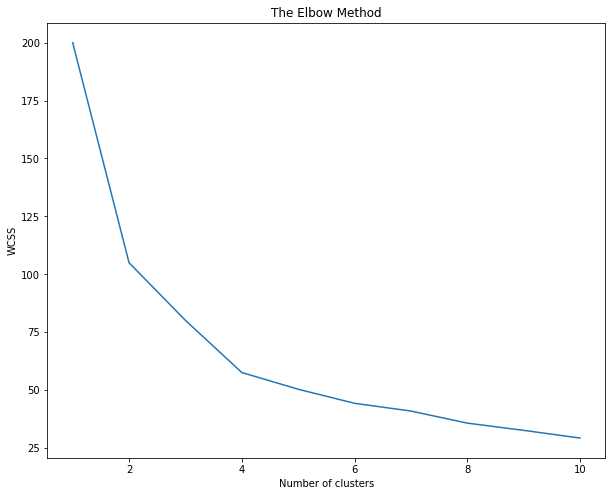

In [14]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters.

### K-Means

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [16]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime_rates['cluster'] = cluster

In [17]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,5.7,138.9,73.9,18.8
2,13.9,243.6,53.8,21.4
3,10.8,257.4,76.0,33.2
4,3.6,78.5,52.1,12.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

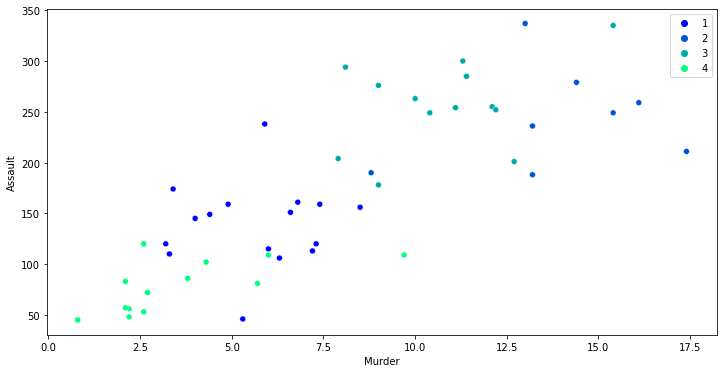

In [21]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['Murder'], y = crime_rates['Assault'],hue=y_kmeans1, palette = 'winter')

#### Hierarchial Clsutering

In [23]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [24]:
z = linkage(crime_rates_standardized, method="complete",metric="euclidean")

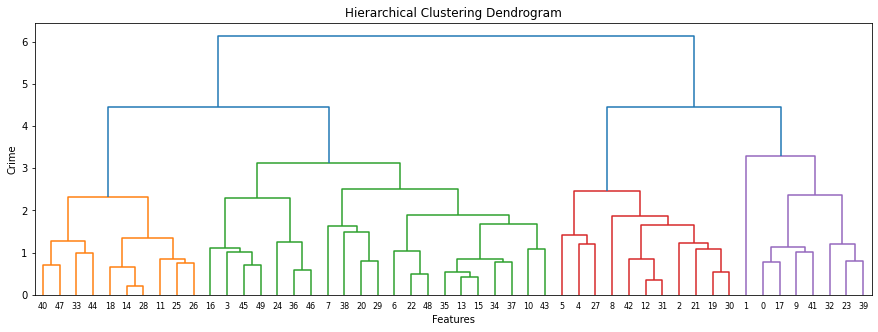

In [25]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [47]:
z1 = linkage(crime_rates_standardized, method="ward",metric="euclidean")

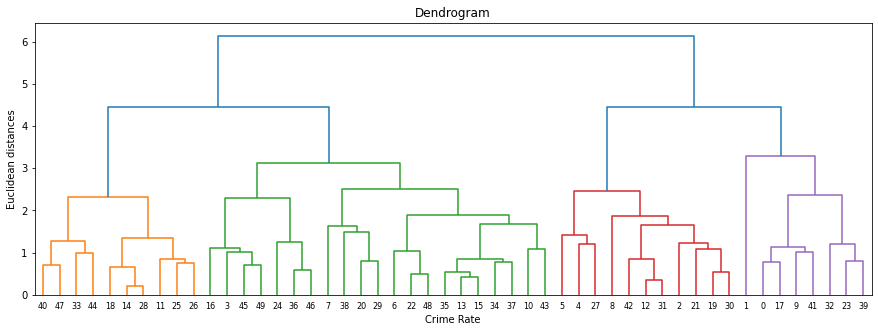

In [48]:
# With Ward method
plt.figure(figsize=(15,5))
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict()
y_pred

### DBSCAN Clustering

In [29]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_rates_standardized)

DBSCAN(eps=1, min_samples=4)

In [30]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [31]:
# Adding clusters to dataset
crime_rates['clusters']=dbscan.labels_
crime_rates

,Murder,Assault,UrbanPop,Rape,cluster,clusters
Alabama,13.2,236,58,21.2,2,0
Alaska,10.0,263,48,44.5,3,-1
Arizona,8.1,294,80,31.0,3,-1
Arkansas,8.8,190,50,19.5,2,-1
California,9.0,276,91,40.6,3,-1
Colorado,7.9,204,78,38.7,3,-1
Connecticut,3.3,110,77,11.1,1,1
Delaware,5.9,238,72,15.8,1,-1
Florida,15.4,335,80,31.9,3,-1
Georgia,17.4,211,60,25.8,2,-1


In [32]:
crime_rates.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,cluster
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,2.555556
1,0,14.050000,238.000000,57.750000,23.200000,2.000000
2,1,4.825000,112.035714,63.357143,16.107143,2.464286


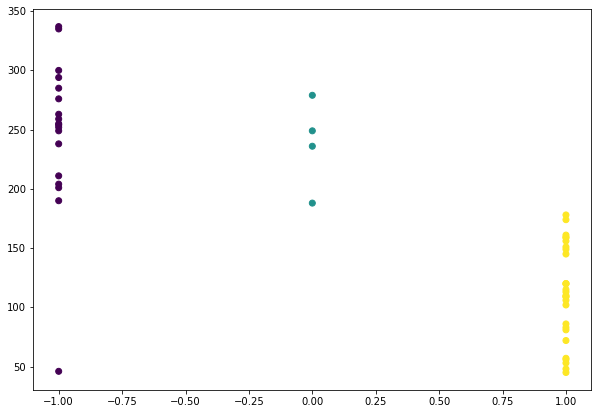

In [34]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_rates['clusters'],crime_rates['Assault'], c=dbscan.labels_) 